# TP 1 - Organización de Datos
## Análisis exploratorio sobre las edificaciones afectadas en el terremoto de 2015 Nepal

In [193]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

# %matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

#sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

# Carga de datos - Info superficial

In [356]:
df_data=pd.read_csv('data/train_values.csv')
df_damage=pd.read_csv('data/train_labels.csv')
DAMAGE_LABELS = ['daños leves','daños moderados','daños extremos'] 
MATERIALS_LABELS = ['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo', 'hormigón no diseñado', 'hormigón diseñado','otros']
USES_LABELS = ['uso agrícola','hotel','alquiler','uso institucional','escuelas','uso industrial','puestos de salud','uso gubernamental','uso policial','otros usos']
colores_mat=['tab:blue','tab:orange', 'tab:green','tab:red', 'tab:purple', 'tab:brown', 'tab:pink','tab:olive','tab:cyan', 'cornflowerblue']

In [195]:
df_data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,"260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00",...,"260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00"
mean,"525,675.48",13.90,701.07,"6,257.88",2.13,26.54,8.02,5.43,0.09,0.76,...,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01
std,"304,545.00",8.03,412.71,"3,646.37",0.73,73.57,4.39,1.92,0.28,0.43,...,0.25,0.18,0.09,0.03,0.02,0.03,0.01,0.01,0.01,0.07
min,4.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"261,190.00",7.00,350.00,"3,073.00",2.00,10.00,5.00,4.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"525,757.00",12.00,702.00,"6,270.00",2.00,15.00,7.00,5.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"789,762.00",21.00,"1,050.00","9,412.00",2.00,30.00,9.00,6.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"1,052,934.00",30.00,"1,427.00","12,567.00",9.00,995.00,100.00,32.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [196]:
df_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [197]:
df_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


## Descripción de los datos por segmentos

In [198]:
data=df_data.loc[df_data['age']!=995,['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','count_families']].describe()
data = data.drop('count')
data.index = ['promedio','desvío estándar','mínimo','25%','50%','75%','máximo']#ASD
data.columns= ['cantidad de pisos','antigüedad','área(%)','altura(%)','cantidad de familias']#ASD
data

,cantidad de pisos,antigüedad,área(%),altura(%),cantidad de familias
promedio,2.13,21.34,8.02,5.43,0.98
desvío estándar,0.73,19.61,4.39,1.92,0.42
mínimo,1.00,0.00,1.00,2.00,0.00
25%,2.00,10.00,5.00,4.00,1.00
50%,2.00,15.00,7.00,5.00,1.00
75%,2.00,30.00,9.00,6.00,1.00
máximo,9.00,200.00,100.00,32.00,9.00


In [199]:
df_data.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].sum().to_frame()

,0
has_superstructure_adobe_mud,23101
has_superstructure_mud_mortar_stone,198561
has_superstructure_stone_flag,8947
has_superstructure_cement_mortar_stone,4752
has_superstructure_mud_mortar_brick,17761
has_superstructure_cement_mortar_brick,19615
has_superstructure_timber,66450
has_superstructure_bamboo,22154
has_superstructure_rc_non_engineered,11099
has_superstructure_rc_engineered,4133


In [200]:
df_data.loc[:,'has_secondary_use_agriculture':'has_secondary_use_other'].sum().to_frame()


,0
has_secondary_use_agriculture,16777
has_secondary_use_hotel,8763
has_secondary_use_rental,2111
has_secondary_use_institution,245
has_secondary_use_school,94
has_secondary_use_industry,279
has_secondary_use_health_post,49
has_secondary_use_gov_office,38
has_secondary_use_use_police,23
has_secondary_use_other,1334


In [201]:
df_data.loc[:,['land_surface_condition','foundation_type', 
               'roof_type', 'ground_floor_type', 'other_floor_type', 
               'position', 'plan_configuration',  'legal_ownership_status']].describe()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


# Análisis

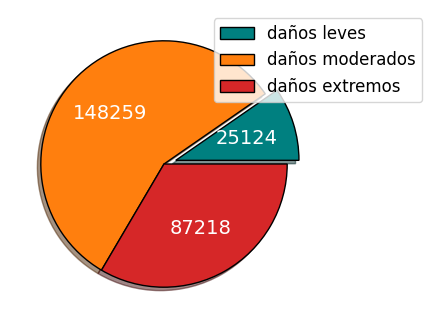

In [202]:
plt.rcParams.update({'font.size': 12})
dam_proportion = df_damage.groupby('damage_grade').count()
dam_proportion = dam_proportion.rename(columns={'building_id':'Edificaciones dañadas'})
visu = dam_proportion.plot.pie(subplots=True, colors = ['teal','tab:orange','tab:red'],
                               figsize=(4,4),
                               textprops={'fontsize': 14,'color':'w','weight':'normal'},
                               shadow=True,
                               labeldistance=None,
                               wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-', 'antialiased': True},
                               explode=(0.1,0,0),
                               startangle=0,
                               labels=DAMAGE_LABELS,
                               autopct=lambda p:'{:.0f}'.format(p * dam_proportion['Edificaciones dañadas'].sum() / 100))
ax=plt.gca()
ax.legend(bbox_to_anchor=(1,1),loc='upper center')
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.savefig("graficos/damage_proportion.png",bbox_inches='tight')

plt.rcParams.update({'font.size': 10})

In [203]:
#MERGE DE DATOS
df_main = df_data.merge(df_damage,how='inner')

In [204]:
#FAMILIAS AFECTADAS
families = df_main.loc[:,['building_id','count_families','damage_grade']].groupby('damage_grade').sum().drop('building_id',axis=1)

families

,count_families
damage_grade,
1,22991
2,145593
3,87834


# Datos categóricos

In [435]:
#DATOS CATEGORICOS -PLANTILLA-
def exp_dato_cat(dato,tipos,nombre,**kwargs):
    compacto = kwargs.get('stacked', True)
    
    ancho=0.6
    if compacto:
        ancho = 0.3 
    
    pre_data = df_main.groupby([dato,'damage_grade']).count()
    
    #me quedo con una columna (no importa cual)
    data = pre_data['age'].to_frame().T

    #calculo las sumas parciales
    values = []
    for col in data.columns:
        values.append(data[col[0]].sum(axis=1)[0])

    # y el total
    total = data[tipos[0]].T   
    for tipo in tipos:
        total[tipo] = data[tipo].T
        
    
    #calculo la proporcion
    data = data.T.div(values, axis=0)


    #reestructuracion del df
    proportion = data.T[tipos[0]].T
    for tipo in tipos:
        proportion[tipo] = data.T[tipo].T


    proportion.index = DAMAGE_LABELS

    #ordeno daños g->m->l (previamente l->m->g)
    proportion = proportion.iloc[::-1]

    proportion.loc['total'] = total.sum()
    proportion = proportion.drop('age',axis=1)
    proportion = proportion.T.sort_values('daños extremos',ascending=True)    
    visu = proportion.drop('total',axis=1).plot.bar(color = ['tab:red','tab:orange','teal'],figsize=(5,3),stacked=compacto,width=ancho,rot=0)
    
    ax = plt.gca()
    ax.legend(bbox_to_anchor=(1.3,1),loc='upper left')
    ax.set_ylabel('Proporcion de daños')
    ax.set_xlabel(nombre)

    ax2=ax.twinx()
    ax2.set_ylabel('Cantidad de edificaciones')
    ax2.plot(proportion['total'],'bD',linestyle=':',color='black')
    ax2.set_ylim(ymin=0)
    ax2.legend(labels=['cantidad'],bbox_to_anchor=(1.3, 0.7),loc='upper left')

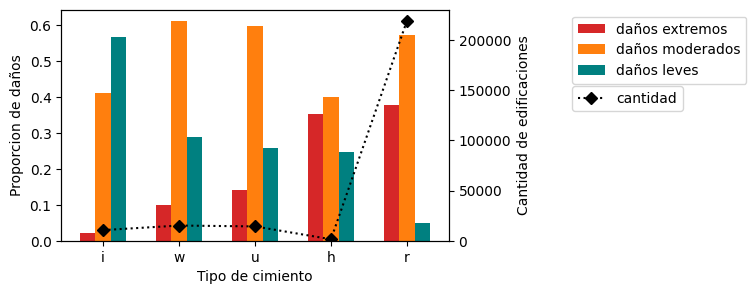

In [432]:
exp_dato_cat('foundation_type',['h','i','r','u','w'],'Tipo de cimiento',stacked=False)

plt.savefig("graficos/cimientos_prop.png",bbox_inches='tight')

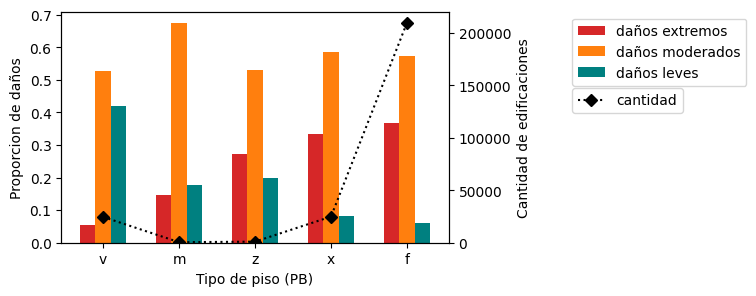

In [514]:
exp_dato_cat('ground_floor_type',['f','m','v','x','z'],'Tipo de piso (PB)', stacked=False)

plt.savefig("graficos/pisos_prop.png",bbox_inches='tight')

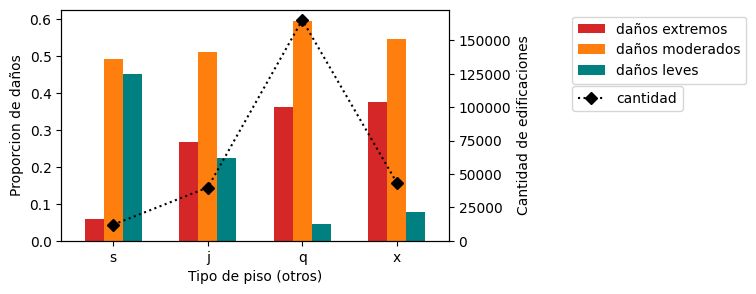

In [279]:
exp_dato_cat('other_floor_type',['j','q','s','x'],'Tipo de piso (otros)',stacked=False)

plt.savefig("graficos/pisos_otros_prop.png",bbox_inches='tight')

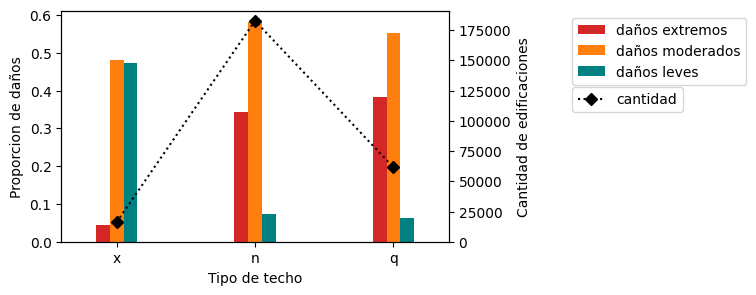

In [264]:
exp_dato_cat('roof_type',['n','q','x'],'Tipo de techo',stacked=False)

plt.savefig("graficos/techos_prop.png",bbox_inches='tight')

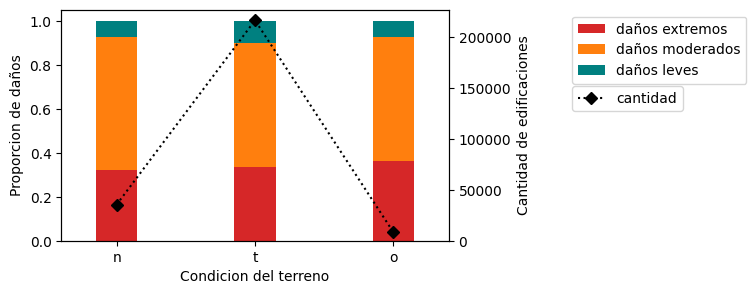

In [211]:
exp_dato_cat('land_surface_condition',['n','o','t'],'Condicion del terreno')

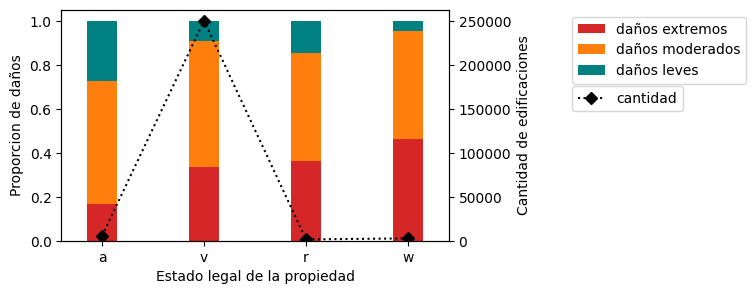

In [212]:
exp_dato_cat('legal_ownership_status',['a','r','v','w'],'Estado legal de la propiedad')

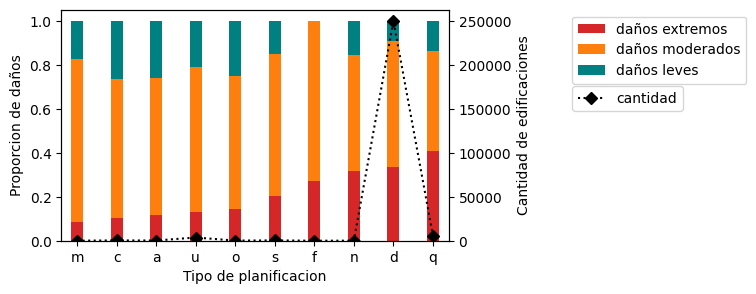

In [213]:
exp_dato_cat('plan_configuration',['a','c','d','f','m','n','o','q','s','u'],'Tipo de planificacion')

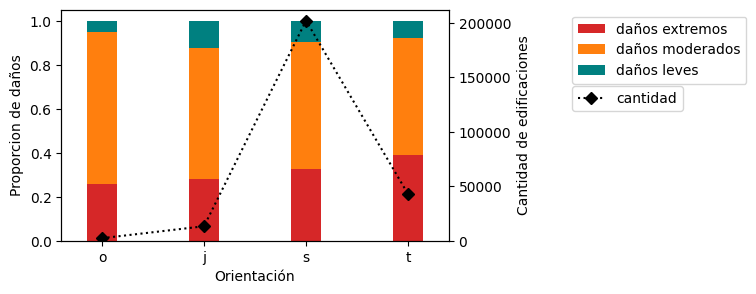

In [214]:
exp_dato_cat('position',['j','o','s','t'],'Orientación')

In [215]:
main_filtered = df_main.loc[(df_main['age']<=200),:]
materials = main_filtered.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other']
#materials[['id','age','damage_grade']] = df_main[['building_id','age','damage_grade']]

age_mean_by_mat = []

for col in materials.columns: 
    age_mean_by_mat.append(main_filtered.loc[main_filtered[col],:]['age'].mean())

total_by_mat = materials.sum().to_frame()
#values

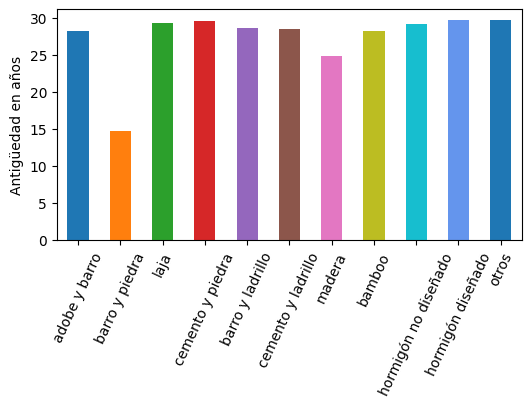

In [505]:
#materials = df_data.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other']
materials[['id','age','damage_grade']] = df_main[['building_id','age','damage_grade']]
material_dam = materials.groupby('damage_grade').sum().drop(['id','age'],axis=1)

material_dam.index = DAMAGE_LABELS

total = material_dam.sum()

data = material_dam.div(material_dam.sum(axis=0), axis=1).iloc[::-1]


data=data.T
data['cantidad'] = age_mean_by_mat

data.index = MATERIALS_LABELS

data['cantidad'].plot.bar(figsize=(6,3),rot=65,color=colores_mat)

ax = plt.gca()
#ax.legend(labels=['antigüedad promedio'],bbox_to_anchor=(1,0.5),loc='upper left')

ax.set_ylabel('Antigüedad en años')

plt.savefig("graficos/mats_edad_prom.png",bbox_inches='tight')



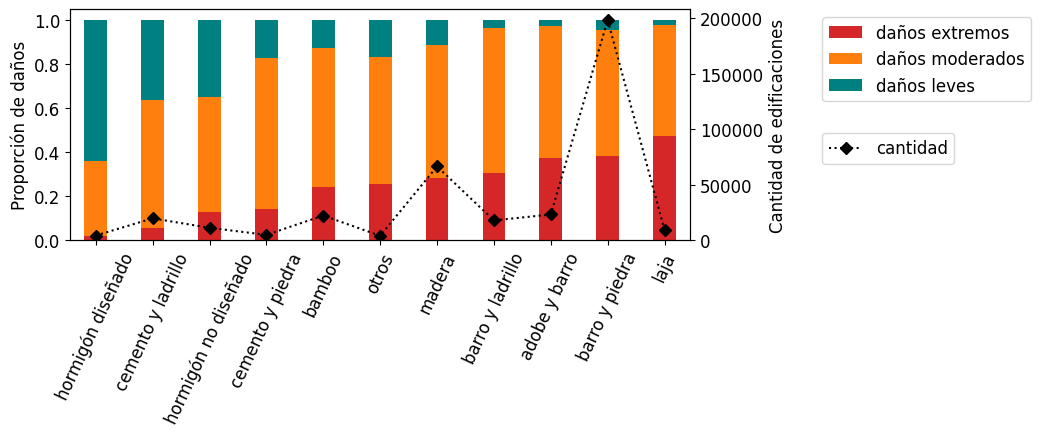

In [260]:
#materials = df_data.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other']
materials[['id','age','damage_grade']] = df_main[['building_id','age','damage_grade']]
material_dam = materials.groupby('damage_grade').sum().drop(['id','age'],axis=1)

material_dam.index = DAMAGE_LABELS

total = material_dam.sum()

data = material_dam.div(material_dam.sum(axis=0), axis=1).iloc[::-1]


data=data.T
data['cantidad'] = total #age_mean_by_mat

data = data.T #.drop(['has_superstructure_rc_engineered','has_superstructure_rc_non_engineered'],axis=1)

data.columns = MATERIALS_LABELS



data = data.T.sort_values('daños extremos',ascending=True)

#total_by_mat = data['edad promedio']
plt.rcParams.update({'font.size': 12})

visu = data.drop('cantidad',axis=1).plot.bar(figsize=(8,3), 
                                                  color = ['tab:red','tab:orange','teal'], 
                                                  stacked=True,width=0.4,rot=65)

ax = plt.gca()
ax.set_ylabel('Proporción de daños')
ax.set_xlabel('Materiales')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
#visu
ax = plt.gca()
ax.set_ylabel('Proporción de daños')
ax.set_xlabel(None)
ax.legend(bbox_to_anchor=(1.2, 1),loc='upper left')
ax2=ax.twinx()
ax2.set_ylabel('Cantidad de edificaciones')
#ax2.set_ylabel('Cantidad de casos')
ax2.plot(data['cantidad'],'bD',linestyle=':',color='black')
ax2.set_ylim(ymin=0)
ax2.legend(labels=['cantidad'],bbox_to_anchor=(1.2, 0.5),loc='upper left')

plt.savefig("graficos/materiales_prop.png",bbox_inches='tight')
plt.rcParams.update({'font.size': 10})

In [217]:
data

,daños extremos,daños moderados,daños leves,cantidad
hormigón diseñado,0.02,0.34,0.64,"4,113.00"
cemento y ladrillo,0.06,0.58,0.36,"19,534.00"
hormigón no diseñado,0.13,0.52,0.35,"11,054.00"
cemento y piedra,0.14,0.68,0.17,"4,730.00"
bamboo,0.24,0.63,0.13,"22,010.00"
otros,0.26,0.58,0.17,"3,883.00"
madera,0.28,0.60,0.11,"65,969.00"
barro y ladrillo,0.31,0.66,0.04,"17,629.00"
adobe y barro,0.37,0.60,0.03,"22,907.00"
barro y piedra,0.38,0.57,0.04,"197,524.00"


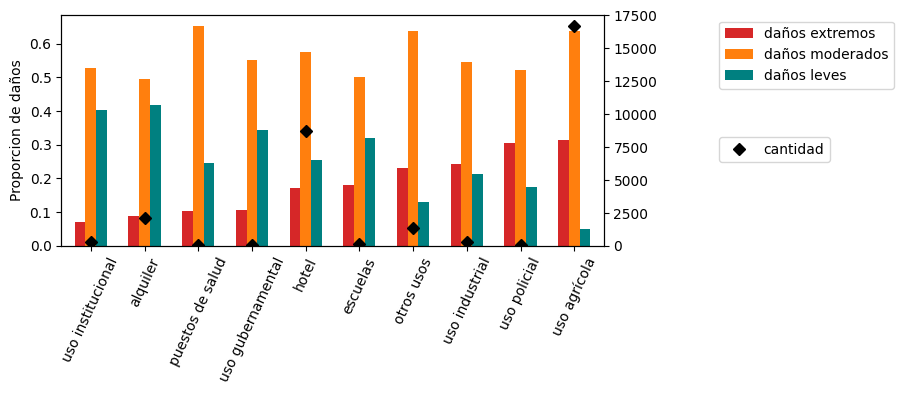

In [453]:
#DATOS BINARIOS
#Recorto el slice que me interesa
uses = main_filtered.loc[:,'has_secondary_use_agriculture':'has_secondary_use_other']
#Le agrego las columnas importantes
uses[['id','damage_grade']] = main_filtered[['building_id','damage_grade']]
#values
data = uses.groupby('damage_grade').sum().drop('id',axis=1)

values = []
for col in data.columns:
    values.append(data[col].sum(axis=0))
    

data.columns = USES_LABELS    

total=data.sum()



data = data.T.div(values, axis=0)

proportion = data.T

proportion.index= DAMAGE_LABELS

proportion = proportion.iloc[::-1]

proportion.loc['total'] =  total #.to_frame().T

dlasd = total.to_frame().T

proportion = proportion.T.sort_values('daños extremos',ascending=True)
visu = proportion.drop('total',axis=1).plot.bar(color = ['tab:red','tab:orange','teal'],figsize=(7,3),stacked=False,width=0.6,rot=65)  #
ax=plt.gca()
ax.legend(bbox_to_anchor=(1.2,1),loc='upper left')
ax.set_ylabel('Proporcion de daños')
#ax.set_xlabel('Usos de las edificaciones')

ax2=ax.twinx()
ax2.plot(proportion['total'],'bD',linestyle=' ',color='black')
ax2.set_ylim(ymin=0)
ax2.legend(labels=['cantidad'],bbox_to_anchor=(1.2, 0.5),loc='upper left')

plt.savefig("graficos/usos_prop.png",bbox_inches='tight')

In [454]:
proportion

,daños extremos,daños moderados,daños leves,total
uso institucional,0.07,0.53,0.40,244.00
alquiler,0.09,0.49,0.42,"2,087.00"
puestos de salud,0.10,0.65,0.24,49.00
uso gubernamental,0.11,0.55,0.34,38.00
hotel,0.17,0.58,0.25,"8,710.00"
escuelas,0.18,0.50,0.32,94.00
otros usos,0.23,0.64,0.13,"1,331.00"
uso industrial,0.24,0.54,0.21,279.00
uso policial,0.30,0.52,0.17,23.00
uso agrícola,0.31,0.64,0.05,"16,704.00"


In [362]:
#PLATINLLA MATERIALES SEGUN USO
def mats_by_use(dato):
    
    materiales = df_main.loc[df_main[dato]==1,'has_superstructure_adobe_mud':'has_superstructure_other']

    materiales[dato] = df_main[dato]
    
    uses_grouped = materiales.groupby(dato).sum().T

    #uses_grouped.plot.pie()

    #f_grouped = f_grouped.sort_values("f",ascending = False)
    uses_grouped.index = MATERIALS_LABELS
    
    return uses_grouped

    #uses_grouped.index.sort_values("f",ascending = False)
    
    #uses_grouped.T.plot.barh(figsize=(5,4),rot=0,color=colores,stacked=True);

    #uses_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None);

    #ax = plt.gca()
    #ax.set_ylabel(nombre)
    #lgnd = ax.legend(bbox_to_anchor = (1,1),loc='upper left');
    #lgnd.remove()
    

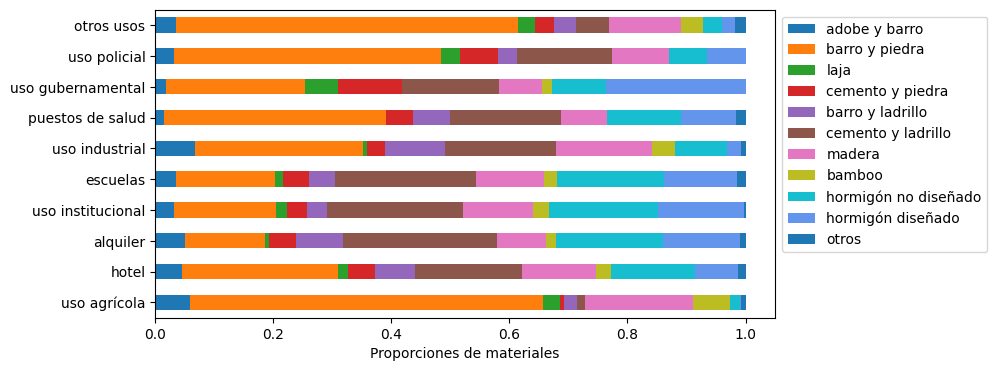

In [429]:
#USOS SECUNDARIOS Y SUS MATERIALES
materials = df_main.loc[df_main[dato]==1,'has_superstructure_adobe_mud':'has_superstructure_other']
uses = df_main.loc[df_main[dato]==1,'has_secondary_use_agriculture':'has_secondary_use_other']

data = mats_by_use('has_secondary_use')

#data
for col in uses:
    data[col] = mats_by_use(col)
    
data = data.div(data.sum(),axis=1)

data= data.T.drop(1)

data.index = USES_LABELS
    
data.plot.barh(figsize=(8,4),rot=0,color=colores_mat,stacked=True);

ax = plt.gca()
ax.set_ylabel(None)

ax.set_xlabel('Proporciones de materiales')
lgnd = ax.legend(bbox_to_anchor = (1,1),loc='upper left');
plt.savefig("graficos/usos_mats.png",bbox_inches='tight')

In [373]:
#mats_by_use('has_secondary_use_gov_office','Materiales de puestos de salud')

In [219]:
df_main['has_secondary_use_school'].sum()

94

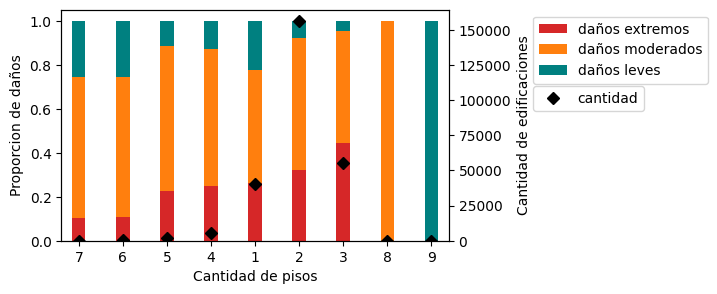

In [516]:
#CANTIDAD DE PISOS
dato='count_floors_pre_eq'
land_data = df_main.groupby([dato,'damage_grade']).count()
#me quedo con una columna (no importa cual)
tipos=np.linspace(1,9,num=9, dtype=int)
data = land_data['age'].to_frame().T

values = []
for col in data.columns:
    values.append(data[col[0]].sum(axis=1)[0])

total = data[tipos[0]].T   
for tipo in tipos:
    total[tipo] = data[tipo].T
    
data = data.T.div(values, axis=0)

proportion = data.T[tipos[0]].T
for tipo in tipos:
    proportion[tipo] = data.T[tipo].T


proportion.index= DAMAGE_LABELS

proportion = proportion.iloc[::-1]

proportion.loc['total'] = total.sum()

proportion = proportion.drop('age',axis=1)

proportion = proportion.T.sort_values('daños extremos',ascending=True)
visu = proportion.drop('total',axis=1).plot.bar(color = ['tab:red','tab:orange','teal'],figsize=(5,3),stacked=True,width=0.3,rot=0)
ax=plt.gca()
ax.legend(bbox_to_anchor=(1.2,1),loc='upper left')
ax.set_ylabel('Proporcion de daños')
ax.set_xlabel('Cantidad de pisos')

ax2=ax.twinx()
ax2.set_ylabel('Cantidad de edificaciones')
ax2.plot(proportion.reset_index()['total'],'bD',linestyle=' ',color='black')
ax2.set_ylim(ymin=0)
ax2.legend(labels=['cantidad'],bbox_to_anchor=(1.2, 0.7),loc='upper left')

plt.savefig("graficos/cant_pisos.png",bbox_inches='tight')

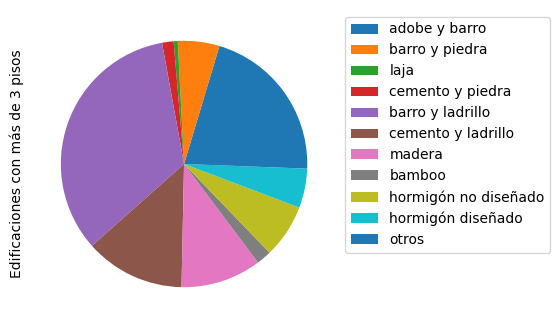

In [520]:
floors_filt = df_main.loc[df_main["count_floors_pre_eq"] > 3,'has_superstructure_adobe_mud':'has_superstructure_other']

#f_type["ground_floor_type"] = df_main["ground_floor_type"]

f_grouped = floors_filt.sum().T


#f_grouped.index = ["barro y piedra","madera","adobe y barro","bamboo","barro y ladrillo","laja","cemento y ladrillo","otros","cemento y piedra"]

f_grouped.index = MATERIALS_LABELS #['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo','otros']

#f_grouped = f_grouped.sort_values("f",ascending = False)

f_grouped.index.sort_values("f",ascending = False)

f_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None);

ax = plt.gca()
ax.set_ylabel('Edificaciones con más de 3 pisos')
ax.legend(bbox_to_anchor = (1,1),loc='upper left');
plt.savefig("graficos/cp1_mats.png",bbox_inches='tight')

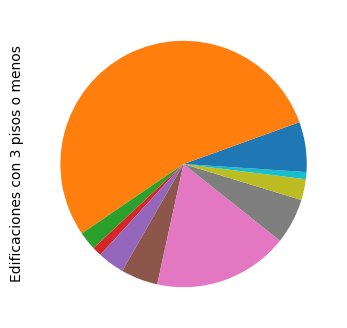

In [522]:
floors_filt = df_main.loc[df_main["count_floors_pre_eq"] <= 3,'has_superstructure_adobe_mud':'has_superstructure_other']

#f_type["ground_floor_type"] = df_main["ground_floor_type"]

f_grouped = floors_filt.sum().T


#f_grouped.index = ["barro y piedra","madera","adobe y barro","bamboo","barro y ladrillo","laja","cemento y ladrillo","otros","cemento y piedra"]

f_grouped.index = MATERIALS_LABELS #['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo','otros']

#f_grouped = f_grouped.sort_values("f",ascending = False)

f_grouped.index.sort_values("f",ascending = False)

f_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None);

ax = plt.gca()
ax.set_ylabel('Edificaciones con 3 pisos o menos')
ax.legend(bbox_to_anchor = (1,1),loc='upper left').remove();
plt.savefig("graficos/cp2_mats.png",bbox_inches='tight')

# Otros análisis

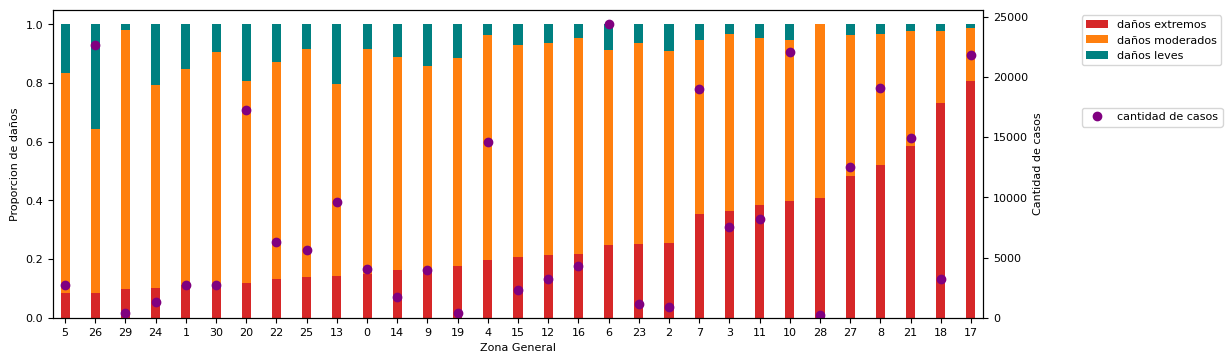

In [224]:
data = df_main.groupby(['geo_level_1_id','damage_grade']).count()
data = data['age'].to_frame().T

#tipos = np.linspace(0,30,num=31, dtype=int)
tipos=[]
#cada 3 columnas (3 niveles de daño)
for col in data[::3]:
    tipos.append(col[0])

values = []
for col in data.columns:
    values.append(data[col[0]].sum(axis=1)[0])

total = data[tipos[0]].T   
for tipo in tipos:
    total[tipo] = data[tipo].T
    
data = data.T.div(values, axis=0)

proportion = data.T[tipos[0]].T
for tipo in tipos:
    proportion[tipo] = data.T[tipo].T

proportion.index= DAMAGE_LABELS

proportion = proportion.iloc[::-1]

proportion.loc['total']= total.sum()

proportion = proportion.drop('age',axis=1)

#LETRA CHICA
plt.rcParams.update({'font.size': 8})

proportion = proportion.T.sort_values('daños extremos',ascending=True)
visu = proportion.drop('total',axis=1).plot.bar(color = ['tab:red','tab:orange','teal'],figsize=(12,4),stacked=True,width=0.3,rot=0)
ax=plt.gca()
ax.legend(bbox_to_anchor=(1.1,1),loc='upper left')
ax.set_ylabel('Proporcion de daños')
ax.set_xlabel('Zona General')

ax2=ax.twinx()
ax2.set_ylabel('Cantidad de casos')
ax2.plot(proportion['total'].reset_index()['total'],'bo',linestyle=' ',color='purple')
ax2.set_ylim(ymin=0)
ax2.legend(labels=['cantidad de casos'],bbox_to_anchor=(1.1, 0.7),loc='upper left')

plt.rcParams.update({'font.size': 10})

In [225]:
data = df_main.groupby(['geo_level_1_id','damage_grade']).count()
data = data['age'].to_frame().T
#data.columns
tipos=[]
#cada 3 columnas (3 niveles de daño)
for col in data[::3]:
    tipos.append(col[0])

## BP

In [226]:
df_main.groupby('geo_level_1_id').sum().loc[:,'has_superstructure_adobe_mud':'has_superstructure_other']['has_superstructure_cement_mortar_brick'].idxmax()

26

<AxesSubplot:xlabel='geo_level_1_id'>

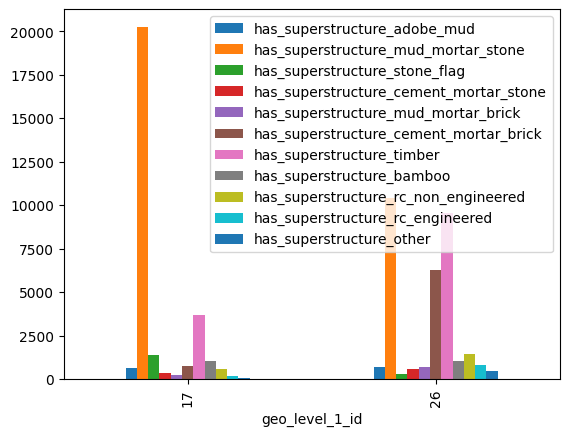

In [227]:
grouped = df_main.groupby('geo_level_1_id').sum().loc[:,'has_superstructure_adobe_mud':'has_superstructure_other']
grouped.T.loc[:,[17,26]].T.plot.bar()

In [228]:
df_main.loc[df_main['geo_level_1_id']==17,'has_superstructure_adobe_mud':'has_superstructure_other'].sum()

has_superstructure_adobe_mud                618
has_superstructure_mud_mortar_stone       20257
has_superstructure_stone_flag              1383
has_superstructure_cement_mortar_stone      341
has_superstructure_mud_mortar_brick         231
has_superstructure_cement_mortar_brick      757
has_superstructure_timber                  3675
has_superstructure_bamboo                  1046
has_superstructure_rc_non_engineered        555
has_superstructure_rc_engineered            157
has_superstructure_other                     44
dtype: int64

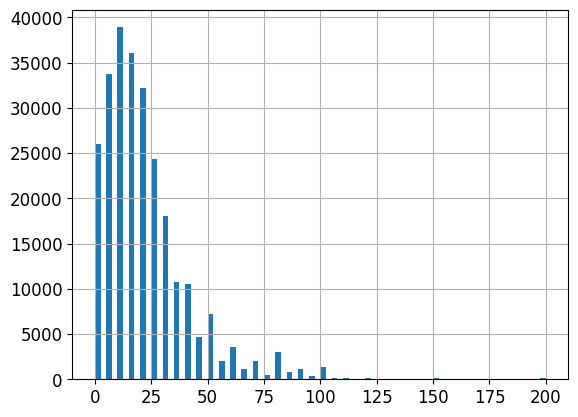

In [508]:

plt.rcParams.update({'font.size': 12})
alturas = main_filtered['age']
alturas.hist(bins=80)

plt.savefig("graficos/edades_hist.png",bbox_inches='tight')

plt.rcParams.update({'font.size': 10})

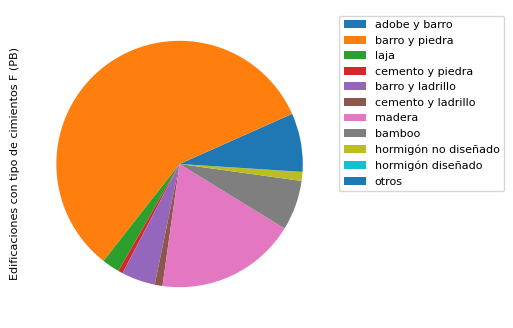

In [243]:
f_type = df_main.loc[df_main["ground_floor_type"] == "f",'has_superstructure_adobe_mud':'has_superstructure_other']

#f_type["ground_floor_type"] = df_main["ground_floor_type"]

f_grouped = f_type.sum().T


#f_grouped.index = ["barro y piedra","madera","adobe y barro","bamboo","barro y ladrillo","laja","cemento y ladrillo","otros","cemento y piedra"]

f_grouped.index = MATERIALS_LABELS #['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo','otros']

#f_grouped = f_grouped.sort_values("f",ascending = False)

f_grouped.index.sort_values("f",ascending = False)

f_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None);

ax = plt.gca()
ax.set_ylabel('Edificaciones con tipo de cimientos F (PB)')
ax.legend(bbox_to_anchor = (1,1),loc='upper left');
plt.savefig("graficos/piso_PB_F.png",bbox_inches='tight')

In [231]:
f_grouped.div(f_grouped.sum(),axis=1)

ground_floor_type,f
adobe y barro,0.07
barro y piedra,0.58
laja,0.02
cemento y piedra,0.01
barro y ladrillo,0.04
cemento y ladrillo,0.01
madera,0.18
bamboo,0.07
hormigón no diseñado,0.01
hormigón diseñado,0.00


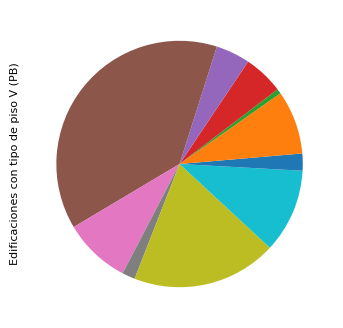

In [241]:
v_type = df_main.loc[df_main["ground_floor_type"] == "v",'has_superstructure_adobe_mud':'has_superstructure_other']

#v_type["ground_floor_type"] = df_main["ground_floor_type"]

v_grouped = v_type.sum().T


#f_grouped.index = ["barro y piedra","madera","adobe y barro","bamboo","barro y ladrillo","laja","cemento y ladrillo","otros","cemento y piedra"]

v_grouped.index = MATERIALS_LABELS #['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo','otros']

#v_grouped = v_grouped.sort_values("v",ascending = False)

v_grouped.index.sort_values("v",ascending = False)

v_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None);

ax = plt.gca()
ax.set_ylabel('Edificaciones con tipo de piso V (PB)')
legnd = ax.legend(loc = (1,0.5));
legnd.remove()
plt.savefig("graficos/piso_PB_V.png",bbox_inches='tight')

In [233]:
v_grouped.div(v_grouped.sum(),axis=1)

ground_floor_type,v
adobe y barro,0.01
barro y piedra,0.08
laja,0.01
cemento y piedra,0.05
barro y ladrillo,0.04
cemento y ladrillo,0.38
madera,0.09
bamboo,0.02
hormigón no diseñado,0.19
hormigón diseñado,0.11


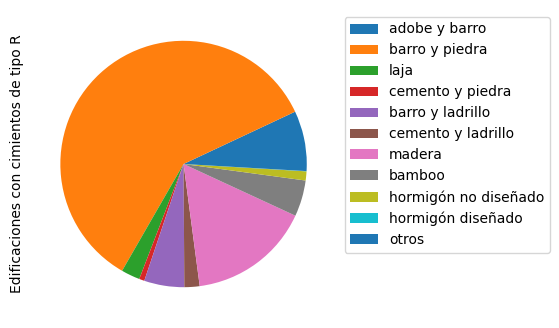

In [234]:
f_type = df_main.loc[df_main["foundation_type"] == "r",'has_superstructure_adobe_mud':'has_superstructure_other']

f_type["foundation_type"] = df_main["foundation_type"]

f_grouped = f_type.groupby("foundation_type").sum().T


#f_grouped.index = ["barro y piedra","madera","adobe y barro","bamboo","barro y ladrillo","laja","cemento y ladrillo","otros","cemento y piedra"]

f_grouped.index = MATERIALS_LABELS #['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo','otros']

#f_grouped = f_grouped.sort_values("f",ascending = False)

f_grouped.index.sort_values("r",ascending = False)

f_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None); #,autopct=lambda p:'{:.0f}'.format(p));

ax = plt.gca()
ax.set_ylabel('Edificaciones con cimientos de tipo R')
ax.legend(bbox_to_anchor = (1,1),loc='upper left');
plt.savefig("graficos/mat_cim_R.png",bbox_inches='tight')

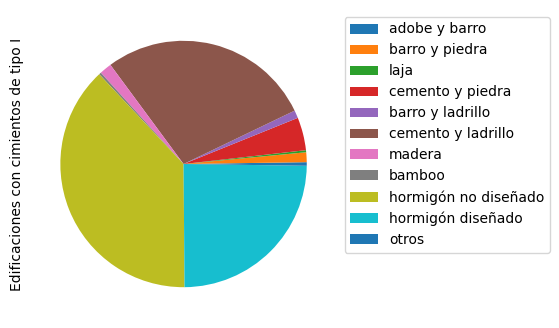

In [235]:
f_type = df_main.loc[df_main["foundation_type"] == "i",'has_superstructure_adobe_mud':'has_superstructure_other']

f_type["foundation_type"] = df_main["foundation_type"]

f_grouped = f_type.groupby("foundation_type").sum().T


#f_grouped.index = ["barro y piedra","madera","adobe y barro","bamboo","barro y ladrillo","laja","cemento y ladrillo","otros","cemento y piedra"]

f_grouped.index = MATERIALS_LABELS #['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo','otros']

#f_grouped = f_grouped.sort_values("f",ascending = False)

f_grouped.index.sort_values("r",ascending = False)

f_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None); #,autopct=lambda p:'{:.0f}'.format(p));

ax = plt.gca()
ax.set_ylabel('Edificaciones con cimientos de tipo I')
legnd=ax.legend(bbox_to_anchor = (1,1),loc='upper left');
plt.savefig("graficos/mat_cim_I.png",bbox_inches='tight')

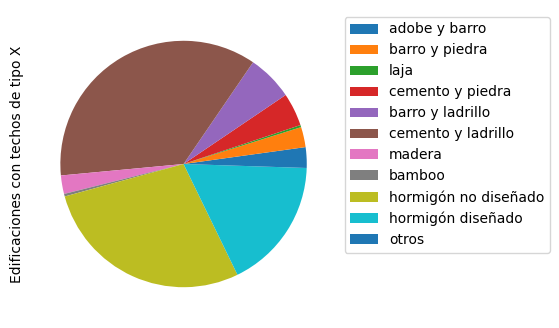

In [459]:
#exp_dato_cat('roof_type',['n','q','x'],'Tipo de techo',stacked=False)
f_type = df_main.loc[df_main["roof_type"] == "x",'has_superstructure_adobe_mud':'has_superstructure_other']

f_type["roof_type"] = df_main["roof_type"]

f_grouped = f_type.groupby("roof_type").sum().T


#f_grouped.index = ["barro y piedra","madera","adobe y barro","bamboo","barro y ladrillo","laja","cemento y ladrillo","otros","cemento y piedra"]

f_grouped.index = MATERIALS_LABELS #['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo','otros']

#f_grouped = f_grouped.sort_values("f",ascending = False)

f_grouped.index.sort_values("r",ascending = False)

f_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None); #,autopct=lambda p:'{:.0f}'.format(p));

ax = plt.gca()
ax.set_ylabel('Edificaciones con techos de tipo X')
legnd=ax.legend(bbox_to_anchor = (1,1),loc='upper left');
plt.savefig("graficos/techo_x.png",bbox_inches='tight')

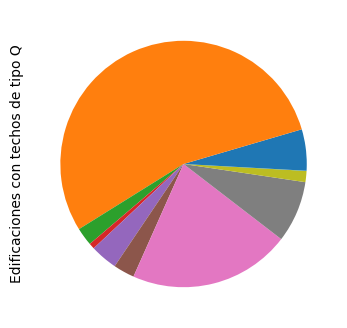

In [460]:
#exp_dato_cat('roof_type',['n','q','x'],'Tipo de techo',stacked=False)
f_type = df_main.loc[df_main["roof_type"] == "q",'has_superstructure_adobe_mud':'has_superstructure_other']

f_type["roof_type"] = df_main["roof_type"]

f_grouped = f_type.groupby("roof_type").sum().T


#f_grouped.index = ["barro y piedra","madera","adobe y barro","bamboo","barro y ladrillo","laja","cemento y ladrillo","otros","cemento y piedra"]

f_grouped.index = MATERIALS_LABELS #['adobe y barro','barro y piedra','laja','cemento y piedra','barro y ladrillo','cemento y ladrillo','madera','bamboo','otros']

#f_grouped = f_grouped.sort_values("f",ascending = False)

f_grouped.index.sort_values("r",ascending = False)

f_grouped.plot.pie(figsize=(5,4),rot=0,subplots=True,labeldistance = None); #,autopct=lambda p:'{:.0f}'.format(p));

ax = plt.gca()
ax.set_ylabel('Edificaciones con techos de tipo Q')
legnd=ax.legend(bbox_to_anchor = (1,1),loc='upper left');
legnd.remove()
plt.savefig("graficos/techo_q.png",bbox_inches='tight')

<AxesSubplot:>

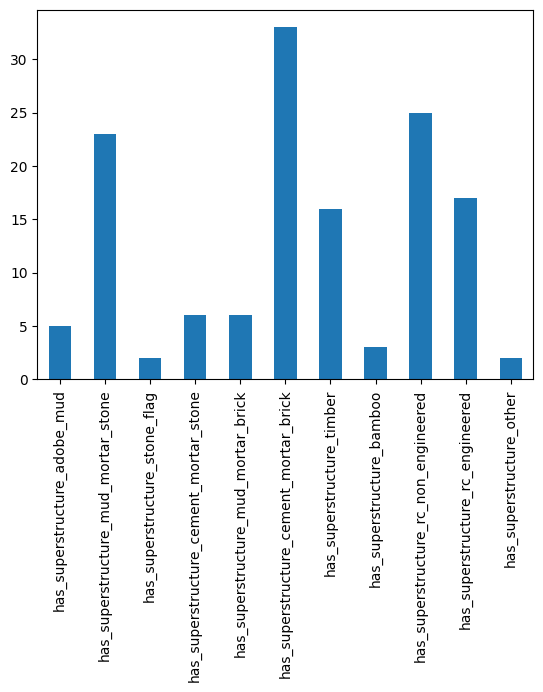

In [236]:
df_main.loc[df_main['has_secondary_use_school']==1,'has_superstructure_adobe_mud':'has_superstructure_other'].sum().plot.bar()

# OTROS ANALISIS

In [490]:
#AGE 995
#quizas sean muy viejos?
age_old=df_main.loc[df_main['age']==995,:]
#age_old.describe()
age_old.groupby('damage_grade').sum()
#age_old.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].sum().plot.bar(color = colores_mat)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,
1,89608259,3171,128571,1100859,363,178105,1771,939,16,101,...,3,13,4,1,0,0,0,0,0,1
2,429131182,11839,559823,4863301,1857,817890,6820,4741,135,588,...,33,38,19,0,0,0,0,0,0,2
3,201760831,5527,329209,2394801,848,387055,2818,2131,43,348,...,37,2,1,0,0,0,0,0,0,0


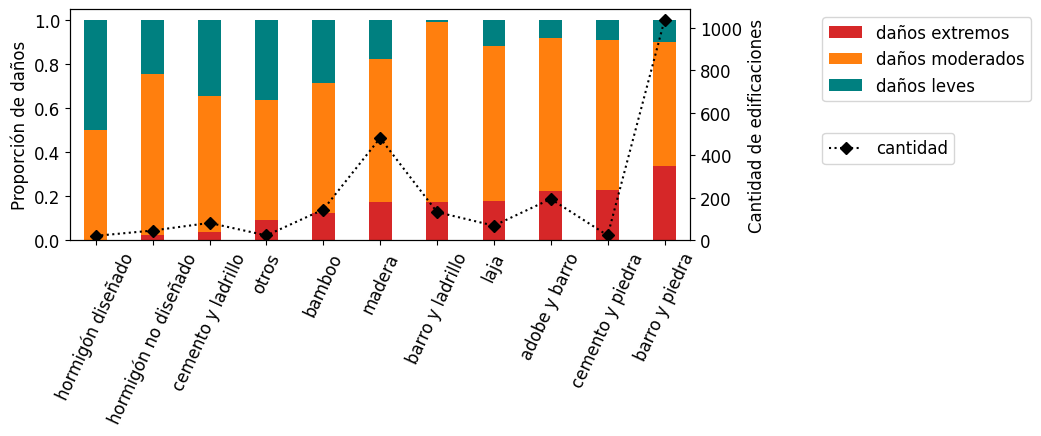

In [492]:
materials = age_old.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other']
materials[['id','age','damage_grade']] = age_old[['building_id','age','damage_grade']]
material_dam = materials.groupby('damage_grade').sum().drop(['id','age'],axis=1)

material_dam.index = DAMAGE_LABELS

total = material_dam.sum()

data = material_dam.div(material_dam.sum(axis=0), axis=1).iloc[::-1]


data=data.T
data['cantidad'] = total #age_mean_by_mat

data = data.T #.drop(['has_superstructure_rc_engineered','has_superstructure_rc_non_engineered'],axis=1)

data.columns = MATERIALS_LABELS



data = data.T.sort_values('daños extremos',ascending=True)

#total_by_mat = data['edad promedio']
plt.rcParams.update({'font.size': 12})

visu = data.drop('cantidad',axis=1).plot.bar(figsize=(8,3), 
                                                  color = ['tab:red','tab:orange','teal'], 
                                                  stacked=True,width=0.4,rot=65)

ax = plt.gca()
ax.set_ylabel('Proporción de daños')
ax.set_xlabel('Materiales')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
#visu
ax = plt.gca()
ax.set_ylabel('Proporción de daños')
ax.set_xlabel(None)
ax.legend(bbox_to_anchor=(1.2, 1),loc='upper left')
ax2=ax.twinx()
ax2.set_ylabel('Cantidad de edificaciones')
#ax2.set_ylabel('Cantidad de casos')
ax2.plot(data['cantidad'],'bD',linestyle=':',color='black')
ax2.set_ylim(ymin=0)
ax2.legend(labels=['cantidad'],bbox_to_anchor=(1.2, 0.5),loc='upper left')

plt.savefig("graficos/age995_prop.png",bbox_inches='tight')
plt.rcParams.update({'font.size': 10})

In [238]:
age_old.loc[:,'has_secondary_use':'has_secondary_use_other'].sum().to_frame()

,0
has_secondary_use,154
has_secondary_use_agriculture,73
has_secondary_use_hotel,53
has_secondary_use_rental,24
has_secondary_use_institution,1
has_secondary_use_school,0
has_secondary_use_industry,0
has_secondary_use_health_post,0
has_secondary_use_gov_office,0
has_secondary_use_use_police,0


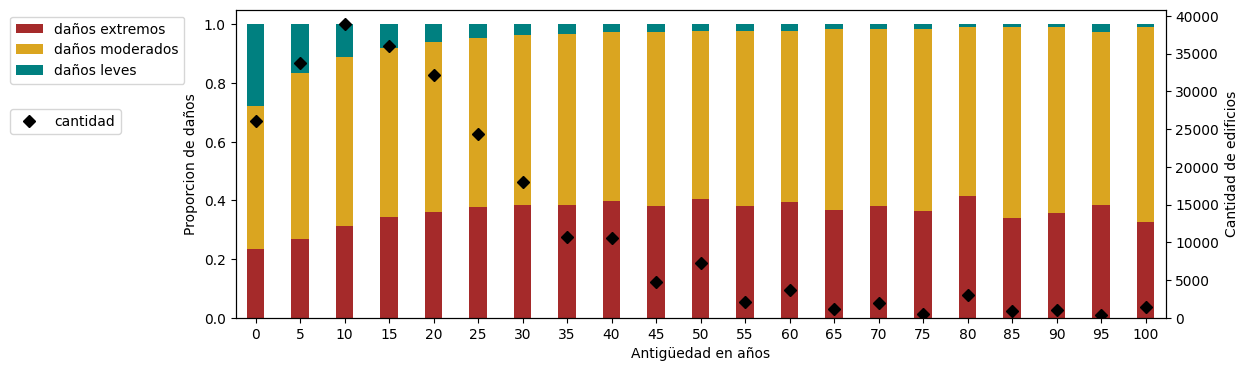

In [484]:
#POR EDADES FILTRADAS
data = df_main.loc[df_main['age']<=100,:].groupby(['age','damage_grade']).count()
data = data['building_id'].to_frame().T

tipos=[]
#cada 3 columnas (3 niveles de daño)
for col in data[::3]:
    tipos.append(col[0])

values = []
for col in data.columns:
    values.append(data[col[0]].sum(axis=1)[0])

total = data[tipos[0]].T   
for tipo in tipos:
    total[tipo] = data[tipo].T
    
data = data.T.div(values, axis=0)

proportion = data.T[tipos[0]].T
for tipo in tipos:
    proportion[tipo] = data.T[tipo].T

proportion.index= DAMAGE_LABELS

proportion = proportion.iloc[::-1]

proportion.loc['total']= total.sum()

proportion = proportion.drop('building_id',axis=1)


proportion = proportion.T #.sort_values('daños extremos',ascending=True)
visu = proportion.drop('total',axis=1).plot.bar(color = ['brown','goldenrod','teal'],figsize=(12,4),stacked=True,width=0.4,rot=0)
ax=plt.gca()
ax.legend(bbox_to_anchor=(-0.25,1),loc='upper left')
ax.set_ylabel('Proporcion de daños')
ax.set_xlabel('Antigüedad en años')

ax2=ax.twinx()
ax2.set_ylabel('Cantidad de edificios')
ax2.plot(proportion['total'].reset_index()['total'],'bD',linestyle=' ',color='black')
ax2.set_ylim(ymin=0)
ax2.legend(labels=['cantidad'],bbox_to_anchor=(-0.25, 0.7),loc='upper left')